# Cox-Ingersoll-Ross (CIR) Short Rate Model

Main characteristics:

- Is a one factor equilibrium model
  
- Mean reversion 
  
- Non-constant volatility

- Avoids negative short rates values

The short rate is given by

$ dr_{t} = a(b-r_{t}) dt + \sigma \sqrt{r_{t}} dW_t $

- $ a $ represents the speed of adjustment (or mean reversion),

- $ b $ represents the long-team mean of the short-term interest rate

- $ \sigma $ represents the volatility of the short rate

- $ dW_t $ is a Wiener process having mean 0 and variance $ dt $.

The discrete form can written as :

$ \Delta r_{t} = a(b-r_{t}) \Delta t + \sigma \sqrt{r_{t}} \epsilon \sqrt{\Delta t} $

where $ \epsilon = \mathcal{N}(0,1) $


## Historic Data

Plotting historic 3-month Treasury Bill Secondary Market Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TB3MS = pd.read_csv('./data/TB3MS.csv')

TB3MS

,DATE,TB3MS
0,2010-03-01,0.15
1,2010-04-01,0.16
2,2010-05-01,0.16
3,2010-06-01,0.12
4,2010-07-01,0.16
...,...,...
164,2023-11-01,5.27
165,2023-12-01,5.24
166,2024-01-01,5.22
167,2024-02-01,5.24


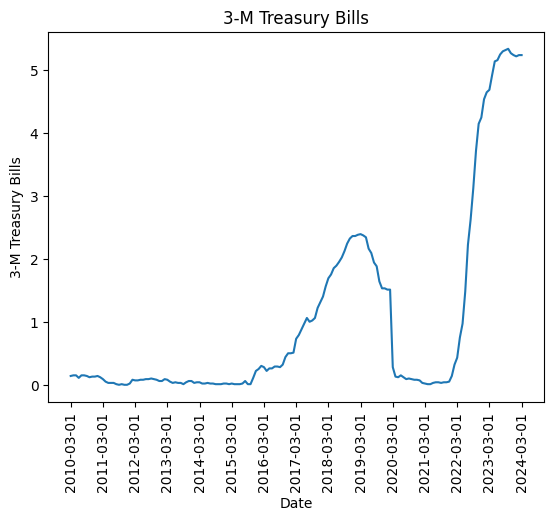

In [3]:
x = np.arange(0, TB3MS.shape[0])

plt.plot(TB3MS['DATE'], TB3MS['TB3MS'])

plt.xticks(np.arange(0, TB3MS.shape[0], step=12), rotation='vertical')

plt.title("3-M Treasury Bills")
plt.xlabel("Date")
plt.ylabel("3-M Treasury Bills")

plt.show()

## Generating Short Rate Paths

First, calculate the delta



In [8]:
TB3MS['Delta'] = (TB3MS['TB3MS'] - TB3MS['TB3MS'].shift(1))/TB3MS['TB3MS'].shift(1)

TB3MS.dropna()

,DATE,TB3MS,Delta
1,2010-04-01,0.16,0.066667
2,2010-05-01,0.16,0.000000
3,2010-06-01,0.12,-0.250000
4,2010-07-01,0.16,0.333333
5,2010-08-01,0.16,0.000000
...,...,...,...
164,2023-11-01,5.27,-0.013109
165,2023-12-01,5.24,-0.005693
166,2024-01-01,5.22,-0.003817
167,2024-02-01,5.24,0.003831
